Summary Statistics:
                 id       host_id  neighbourhood_group    latitude  \
count  4.040000e+02  4.040000e+02                  0.0  404.000000   
mean   5.075502e+17  2.215851e+08                  NaN   42.657382   
std    4.254315e+17  1.796507e+08                  NaN    0.009623   
min    1.489424e+06  6.490680e+05                  NaN   42.630660   
25%    4.662195e+07  4.762598e+07                  NaN   42.651845   
50%    6.686083e+17  1.870609e+08                  NaN   42.657168   
75%    9.022064e+17  3.872668e+08                  NaN   42.662161   
max    1.104977e+18  5.531120e+08                  NaN   42.714896   

        longitude        price  minimum_nights  number_of_reviews  \
count  404.000000   350.000000      404.000000         404.000000   
mean   -73.776875   114.882857        5.222772          54.732673   
std      0.019607   108.416846       21.515183          98.541437   
min    -73.876489    24.000000        1.000000           0.000000   
25% 

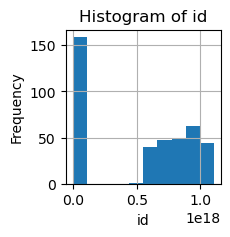

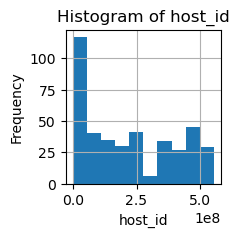

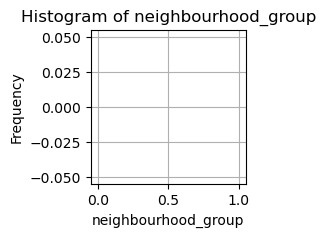

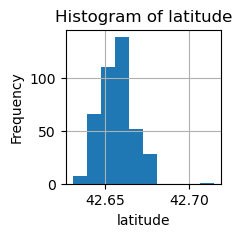

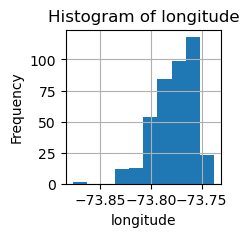

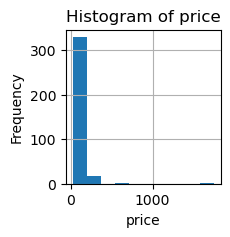

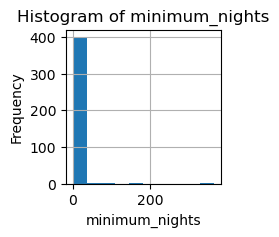

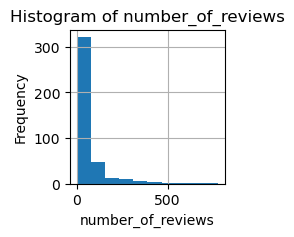

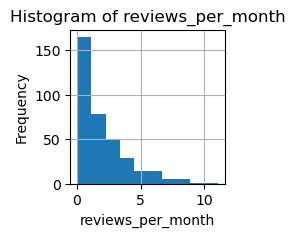

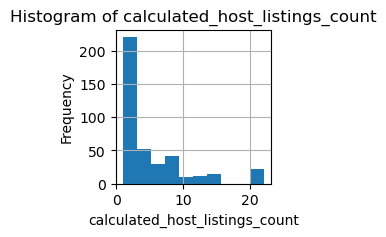

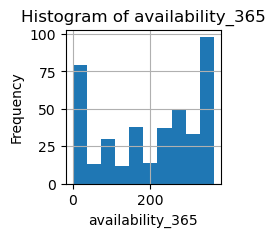

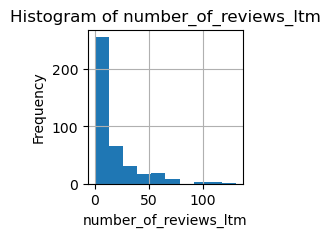

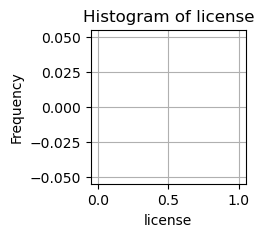


Encoded data:
                      id                                              name  \
0                1489424     Welcoming, easygoing, comfy bed, entire level   
1                2992450                        Luxury 2 bedroom apartment   
2                3820211         Restored Precinct in Center Sq. w/Parking   
3                5651579        Large studio apt  by Capital Center & ESP@   
4                6623339  Center Sq. Loft in Converted Precinct w/ Parking   
..                   ...                                               ...   
399  1091422934956081673                    2 bed with parking off Madison   
400  1091500387329731524                  Triplex oasis w:parking near MVP   
401  1097995825442731795                          New Center square studio   
402  1100876731732967826                  Homey, Quiet 2BR W/ Washer Dryer   
403  1104977057298366617  Safe, Affordable, Adorable w/ Hot Tub and Coffee   

       host_id host_name  neighbourhood_group   

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class classs:
    def __init__(self, file_path):
        self.data = self.read_data(file_path)

    def read_data(self, file_path):
        """
        Read data from a file of different formats (CSV, Excel, JSON).
        """
        try:
            df = pd.read_csv(file_path, encoding='latin-1')
            return df
        except pd.errors.ParserError:
            pass
        
        try:
            df = pd.read_excel(file_path, engine='openpyxl')
            return df
        except pd.errors.XLRDError:
            pass

        try:
            df = pd.read_excel(file_path, engine='openpyxl', encoding='latin1')
            return df
        except pd.errors.XLRDError:
            pass

        try:
            df = pd.read_json(file_path)
            return df
        except ValueError:
            pass

        # Unsupported file format
        print("Error: Unsupported file format.")
        return None

    def print_summary_statistics(self):
        """
        Print key statistical summaries of the data.
        """
        if self.data is not None:
            # Exclude non-numeric columns
            numeric_data = self.data.select_dtypes(include=np.number)

            # Summary statistics
            print("Summary Statistics:")
            print(numeric_data.describe())

            # Average of each numeric column using NumPy
            print("\nAverage Values :")
            print(np.mean(numeric_data, axis=0))

            # Median of each numeric column using NumPy
            print("\nMedian Values:")
            print(np.median(numeric_data, axis=0))

            # Most frequent value of each column
            print("\nMost Frequent Values:")
            print(numeric_data.mode().iloc[0])

            # Histogram for numeric columns using Matplotlib
            for col in numeric_data.columns:
                plt.figure(figsize=(2, 2))
                numeric_data[col].hist()
                plt.title(f'Histogram of {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
                plt.grid(True)
                plt.show()
        else:
            print("Error: No data loaded.")
            
    def handle_missing_values(self, strategy='remove', threshold=0.5):
        """
        Handle missing values in the DataFrame.
        """
        if strategy == 'remove':
            self.data = self.data.dropna(axis=0, thresh=int(threshold * self.data.shape[1]))
        elif strategy == 'impute':
            self.data = self.data.fillna(self.data.mean())
    
    def encode_categorical_data(self, column, method='one-hot'):
        """
        Encode categorical data using specified method.
        """
        if method == 'one-hot':
            encoded_data = pd.get_dummies(self.data[column], prefix=column)
            self.data = pd.concat([self.data.drop(column, axis=1), encoded_data], axis=1)
        elif method == 'label':
            self.data[column] = pd.factorize(self.data[column])[0]
        else:
            raise ValueError("Invalid encoding method. Choose from 'one-hot' or 'label'.")
        return self.data

# Example usage:
file_path = r"C:\Users\douaa\OneDrive\Desktop\downtest\listings.csv"
classs_instance = classs(file_path)
classs_instance.handle_missing_values(strategy='remove', threshold=0.5)
classs_instance.print_summary_statistics()

# Encode 
encoded_data = classs_instance.encode_categorical_data('room_type', method='label')
print("\nEncoded data:")
print(encoded_data)
